<center>

# <font color='green'>**Aerofit Case Study**</font>

---



In [ ]:
# Mounting Google Drive to access dataset stored
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
# Importing necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Projects/Aerofit_Case_Study/aerofit_treadmill.csv")
#df = pd.read_csv("aerofit_treadmill.csv")
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


## **Basic Data Exploration**



In [4]:
print("\nHigh Level Statistics: ")
print("Number of Points:", len(df))
print("Number of features: ",df.shape )
print("Number of Types: ", df["Product"].nunique())
print("Number of Data points per Product: ", df["Product"].value_counts())


High Level Statistics: 
Number of Points: 180
Number of features:  (180, 9)
Number of Types:  3
Number of Data points per Product:  Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [7]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [8]:
df["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [9]:
df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [10]:
#check if there are any duplicate rows
df.duplicated().sum()

0

In [11]:
# check for the count of null values for all
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<font color='orange'>**Observations:**</font>


1.   There are in total 180 rows with 9 columns
2.   Three columns are data types of "object" and remaining six columns are "int"
3.   There are no null values in any of the columns
4.   No duplicated rows as well
5.   There are three different types of products are there in the data i.e., KP281, KP481, KP781

In [14]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [15]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


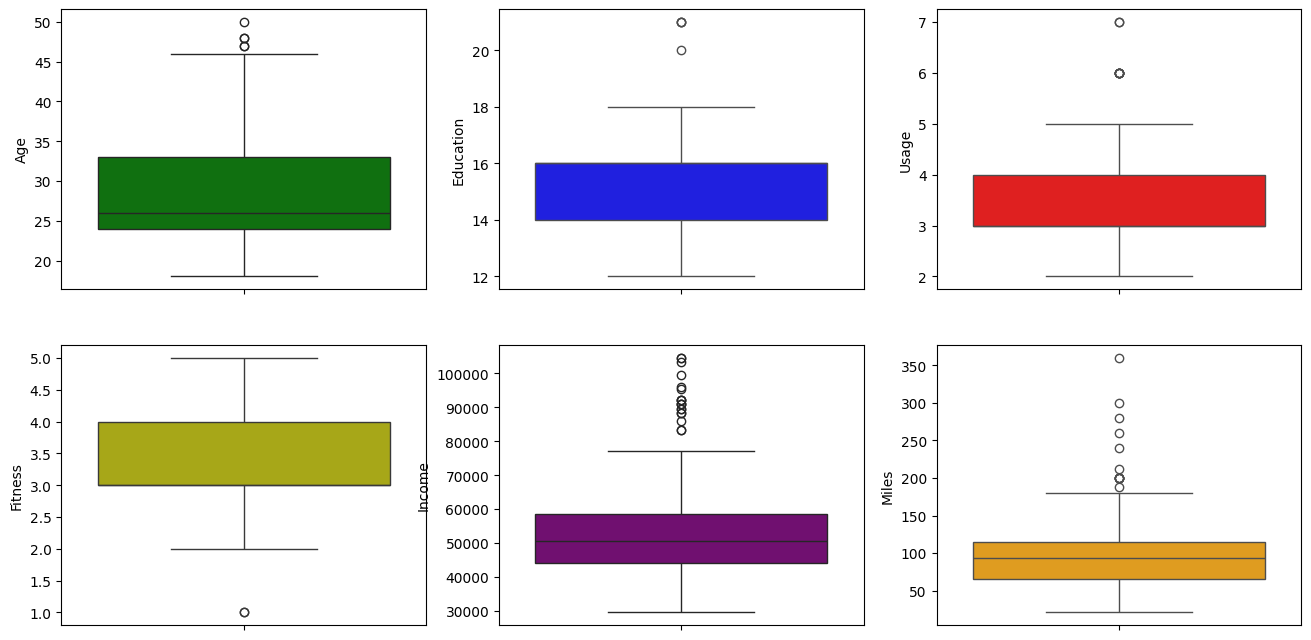

In [16]:
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
sns.boxplot(data = df, y = df['Age'], color = 'g')
plt.subplot(2,3,2)
sns.boxplot(data = df, y = df['Education'], color = 'b')
plt.subplot(2,3,3)
sns.boxplot(data = df, y = df['Usage'], color = 'r')
plt.subplot(2,3,4)
sns.boxplot(data = df, y = df['Fitness'], color = 'y')
plt.subplot(2,3,5)
sns.boxplot(data = df, y = df['Income'], color = 'purple')
plt.subplot(2,3,6)
sns.boxplot(data = df, y = df['Miles'], color = 'orange')
plt.show()

In [17]:
bins = [0,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_Bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Mile_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,50-100


In [18]:
bins = [0,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_Bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Mile_Bins,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,100-150,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,50-100,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,50-100,<35000


In [19]:
bins = [0,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Mile_Bins,Income_Bins,Age_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,100-150,<35000,<20
1,KP281,19,Male,15,Single,2,3,31836,75,50-100,<35000,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,50-100,<35000,<20


Clipping the data between 5th Pecentile and 95th Percentile for treating the outliers

In [20]:
clipped_df = df.copy()

In [21]:
numerical_columns = ['Age','Education','Income','Usage','Fitness','Miles']
for col in numerical_columns:
    percentile_5 = np.percentile(clipped_df[col], 5)
    percentile_95 = np.percentile(clipped_df[col], 95)
    clipped_df[col] = np.round(np.clip(clipped_df[col], percentile_5, percentile_95),2)

## **Visual Analysis**

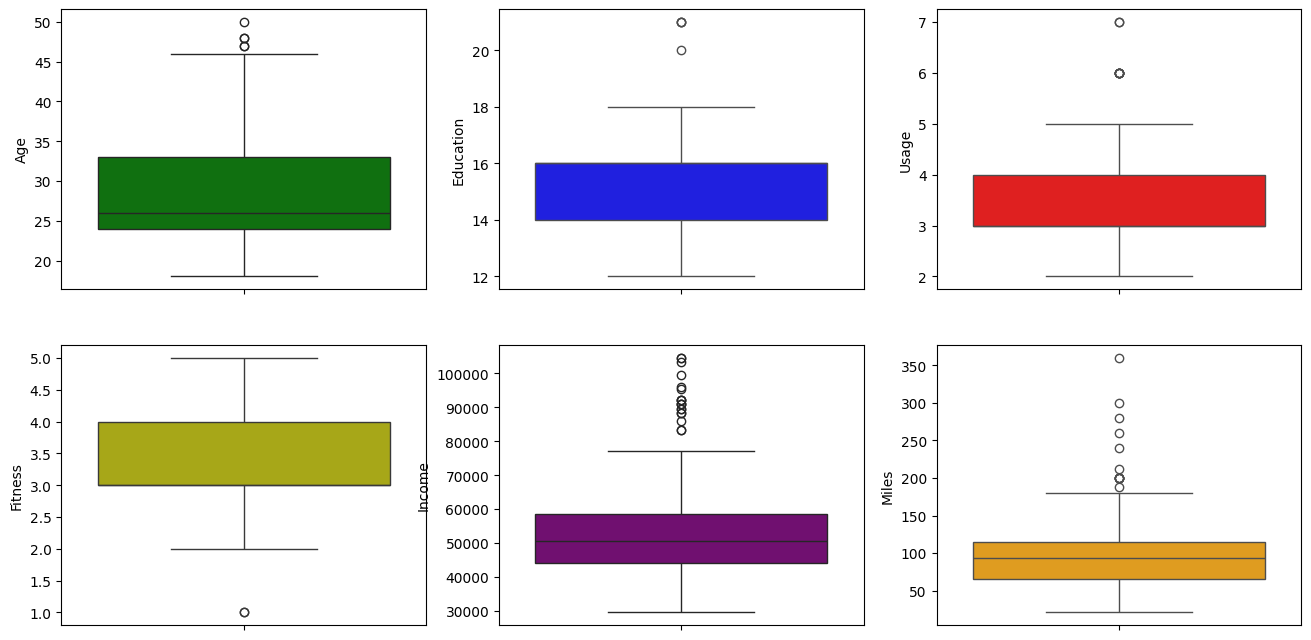

In [22]:
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
sns.boxplot(data = df, y = df['Age'], color = 'g')
plt.subplot(2,3,2)
sns.boxplot(data = df, y = df['Education'], color = 'b')
plt.subplot(2,3,3)
sns.boxplot(data = df, y = df['Usage'], color = 'r')
plt.subplot(2,3,4)
sns.boxplot(data = df, y = df['Fitness'], color = 'y')
plt.subplot(2,3,5)
sns.boxplot(data = df, y = df['Income'], color = 'purple')
plt.subplot(2,3,6)
sns.boxplot(data = df, y = df['Miles'], color = 'orange')
plt.show()

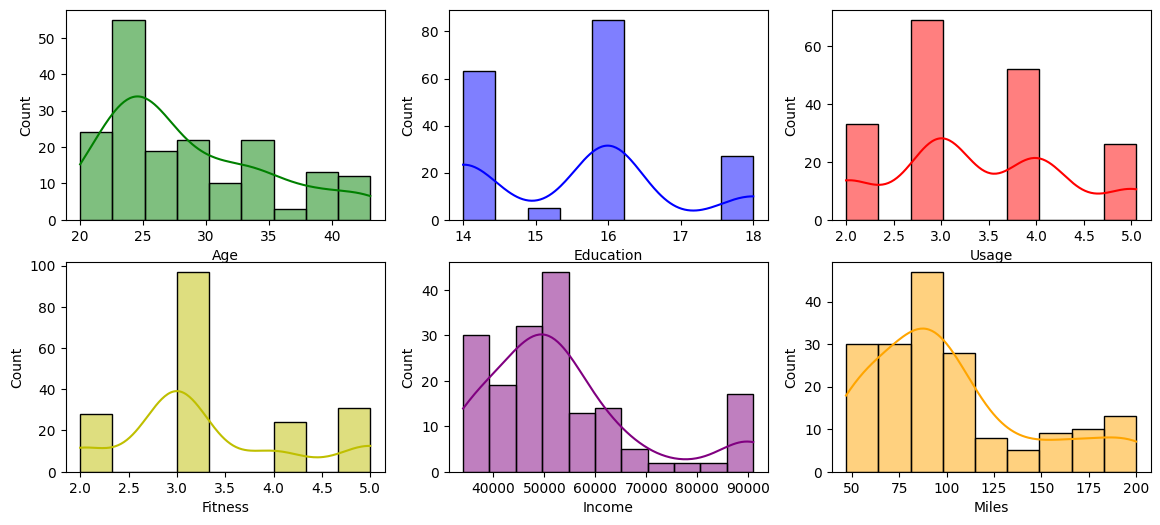

In [23]:
plt.figure(figsize = (14,6))
plt.subplot(2,3,1)
sns.histplot(data=clipped_df, x="Age", kde=True, color = 'g')
plt.subplot(2,3,2)
sns.histplot(data=clipped_df, x="Education", kde=True, color = 'b')
plt.subplot(2,3,3)
sns.histplot(data=clipped_df, x="Usage", kde=True, color = 'r')
plt.subplot(2,3,4)
sns.histplot(data=clipped_df, x="Fitness", kde=True, color = 'y')
plt.subplot(2,3,5)
sns.histplot(data=clipped_df, x="Income", kde=True, color = 'purple')
plt.subplot(2,3,6)
sns.histplot(data=clipped_df, x="Miles", kde=True, color = 'orange')
plt.show()

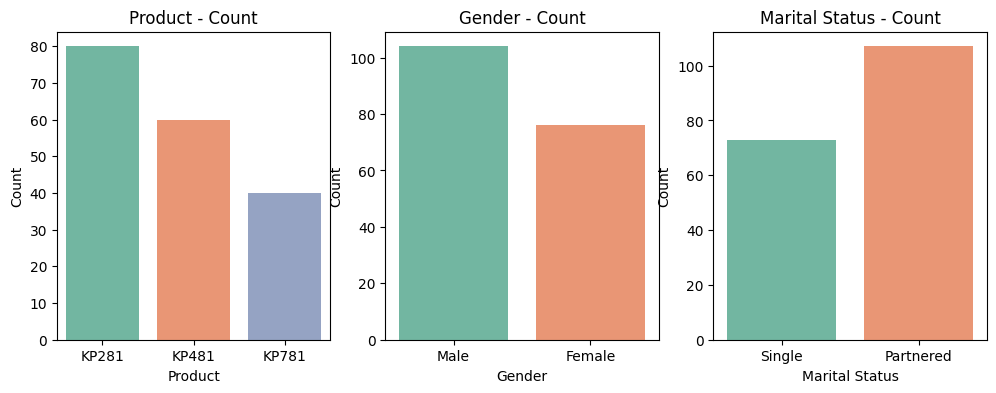

In [24]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
sns.countplot(data = clipped_df,  x = 'Product', hue = 'Product', legend = False, palette = 'Set2')
plt.title('Product - Count')
plt.xlabel("Product")
plt.ylabel("Count")
plt.subplot(1,3,2)
sns.countplot(data = clipped_df,  x = 'Gender', hue = 'Gender', legend = False, palette = 'Set2')
plt.title('Gender - Count')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.subplot(1,3,3)
sns.countplot(data = clipped_df,  x = 'MaritalStatus', hue = 'MaritalStatus', legend = False, palette = 'Set2')
plt.title('Marital Status - Count')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

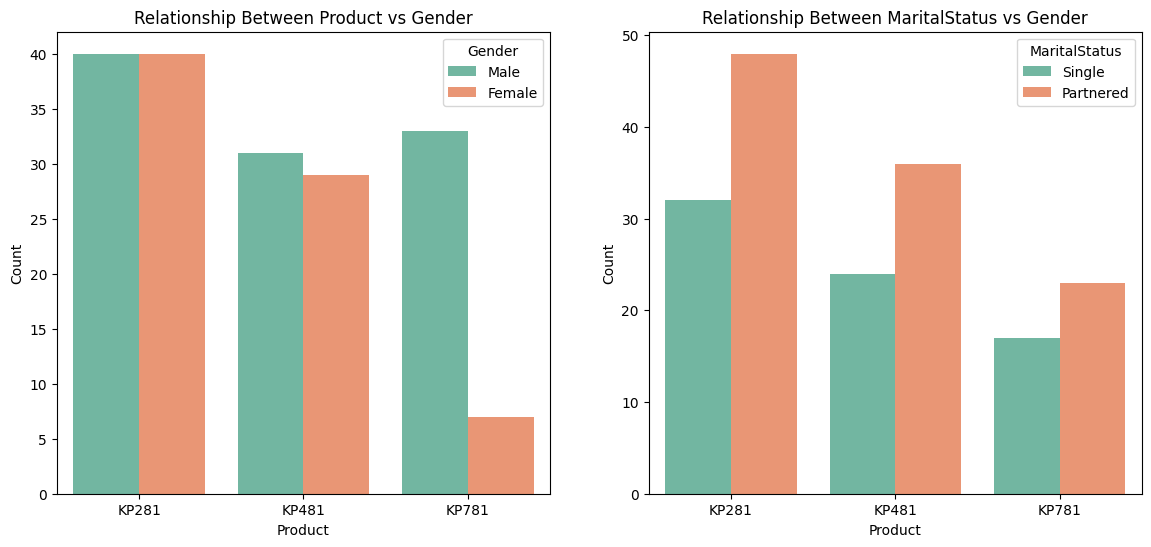

In [25]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(data = clipped_df,  x = 'Product', hue = 'Gender', palette = 'Set2')
plt.title('Relationship Between Product vs Gender')
plt.xlabel("Product")
plt.ylabel("Count")
plt.subplot(1,2,2)
sns.countplot(data = clipped_df,  x = 'Product', hue = 'MaritalStatus', palette = 'Set2')
plt.title('Relationship Between MaritalStatus vs Gender')
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

<font color='orange'>**Observations:**</font>

**Product vs Gender**
- Equal number of males and females have purchased KP281 product and Almost same
for the product KP481
- Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus**
- Customer who is Partnered, is more likely to purchase the product.

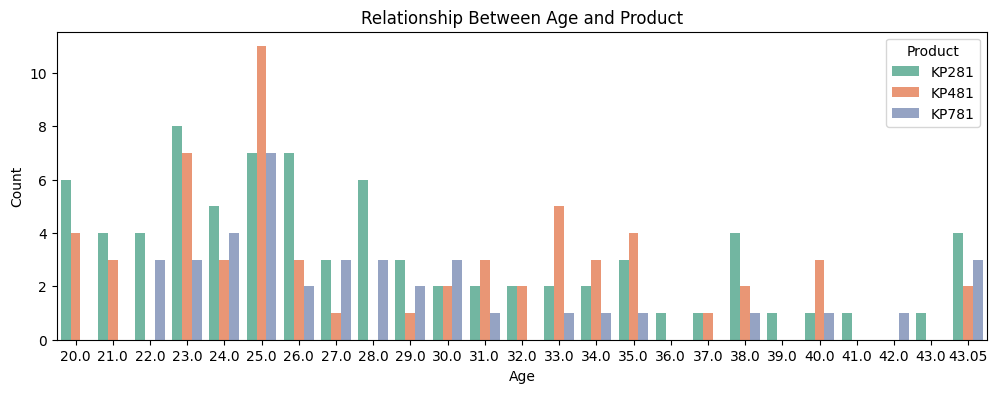

In [26]:
plt.figure(figsize = (12,4))
sns.countplot(data = clipped_df,  x = 'Age', hue = 'Product', palette = 'Set2')
plt.title('Relationship Between Age and Product')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [27]:
clipped_df['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)
clipped_df['Gender'].replace(['Female', 'Male'], [1, 0], inplace=True)
clipped_df['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

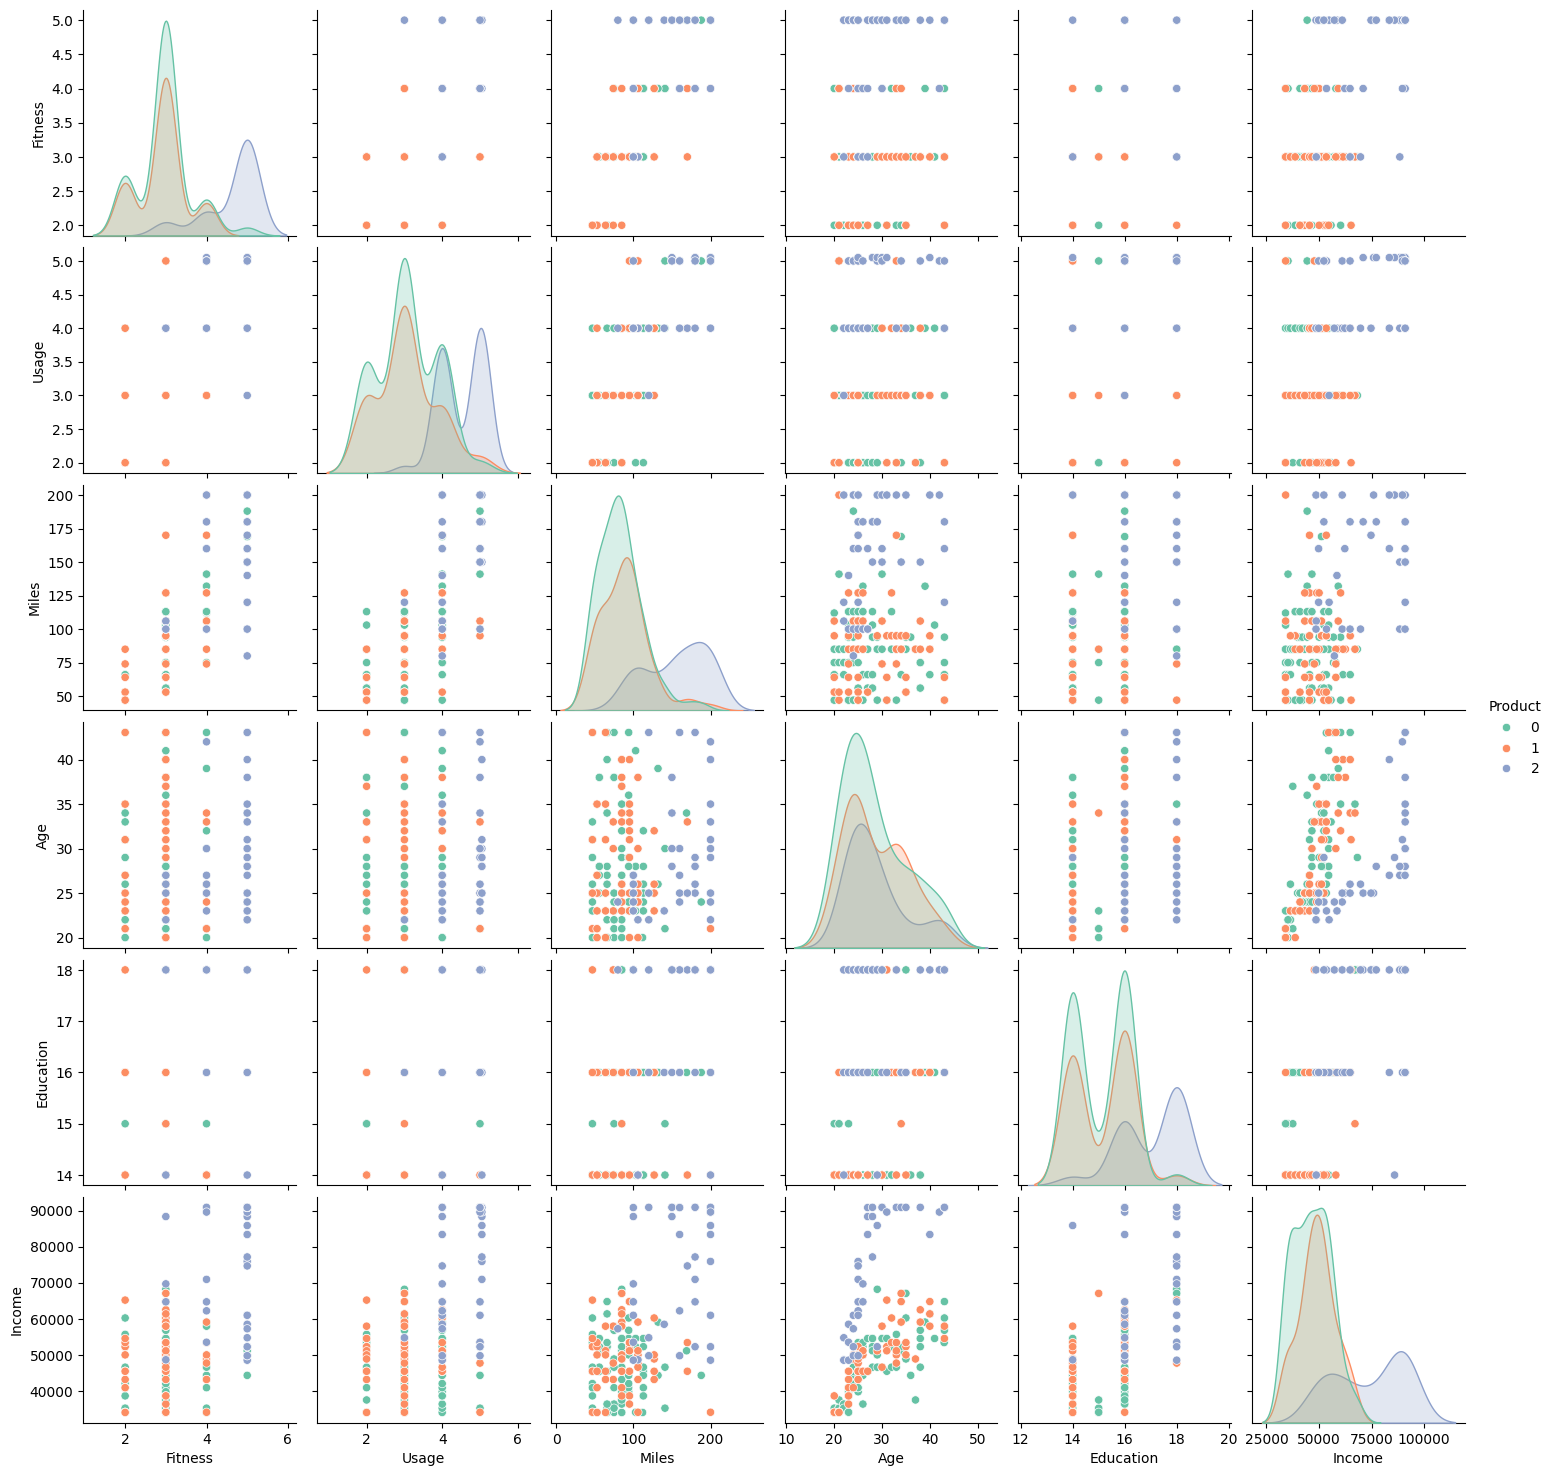

In [45]:
sns.pairplot(data=clipped_df[['Fitness','Usage','Miles','Product','Age','Education','Income']], hue='Product', palette = 'Set2')

In [29]:
cor = clipped_df.corr(numeric_only = True)
cor

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.027065,-0.230653,0.494001,-0.017602,0.516005,0.604266,0.627597,0.593494
Age,0.027065,1.000000,-0.027288,0.301971,0.184322,0.015394,0.057361,0.514362,0.029636
Gender,-0.230653,-0.027288,1.000000,-0.128270,0.018836,-0.213916,-0.258551,-0.203453,-0.227791
Education,0.494001,0.301971,-0.128270,1.000000,0.081408,0.413600,0.441082,0.628597,0.377294
MaritalStatus,-0.017602,0.184322,0.018836,0.081408,1.000000,-0.037195,-0.054196,0.139382,-0.020019
Usage,0.516005,0.015394,-0.213916,0.413600,-0.037195,1.000000,0.661978,0.481608,0.771030
Fitness,0.604266,0.057361,-0.258551,0.441082,-0.054196,0.661978,1.000000,0.546998,0.826307
Income,0.627597,0.514362,-0.203453,0.628597,0.139382,0.481608,0.546998,1.000000,0.537297
Miles,0.593494,0.029636,-0.227791,0.377294,-0.020019,0.771030,0.826307,0.537297,1.000000


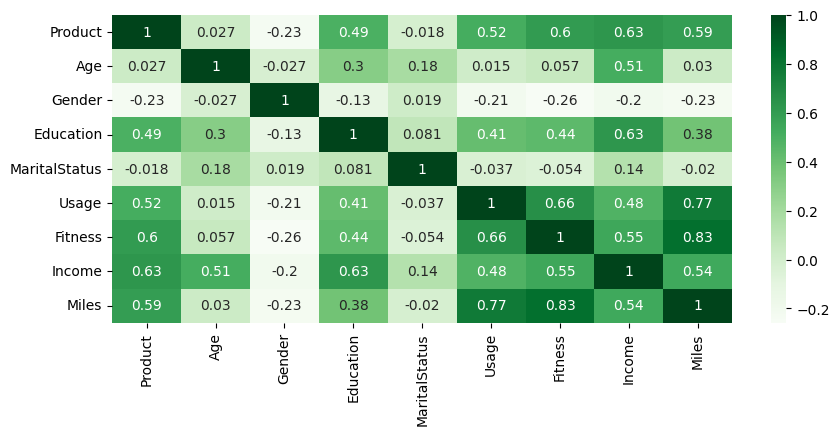

In [30]:
plt.figure(figsize=(10,4))
sns.heatmap(cor, cmap = 'Greens', annot = True)
plt.show()

<font color='orange'>**Observations:**</font>
- Gender did not have much correlation with other columns.
- Eductaion is highly correlated with income and has impact on product purchased.
- Age is highly correlated with income.
- Marital Status has smaller correlation between Age and Income.
- Usage is correlated well with Fitness and Miles
- Income is highly correlated with Product and Education. It also had good correlation with Age, usage, Fitness, Miles.
- We can say that Age and Education are affecting the Income which inturn affects the product purchase.

## **Computing Probabilities**




In [31]:
df_crosstab = pd.crosstab(index = df['Product'], columns='count', normalize = True)
df_crosstab

col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


<font color='orange'>**Observations:**</font>

In all the tables, we can observe the last row named All, which consists of the overall probabilities of purchases of those 3 treadmills, which is as follows:

- Probability of purchase of KP281 = 44.44%
- Probability of purchase of KP481 = 33.33%
- Probability of purchase of KP781 = 22.22%

In [32]:
def calculate_probabilities(column):
    crosstab = pd.crosstab(df[column], df['Product'],margins = True, normalize = True)
    print(f"Probabilities based on {column}:")
    print(crosstab)
    print("\n")

In [33]:
calculate_probabilities('Gender')

Probabilities based on Gender:
Product     KP281     KP481     KP781       All
Gender                                         
Female   0.222222  0.161111  0.038889  0.422222
Male     0.222222  0.172222  0.183333  0.577778
All      0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>

**Probability of Female purchase treadmill is 42.22%**
- P(KP281|Female) = 22.22%
- P(KP481|Female) = 16.11%
- P(KP781|Female) = 3.88%

**Probability of Male purchase treadmill is 57.77%**

- P(KP281|Male) = 22.22%
- P(KP481|Male) = 17.22%
- P(KP781|Male) = 18.33%

In [34]:
calculate_probabilities('Education')

Probabilities based on Education:
Product       KP281     KP481     KP781       All
Education                                        
12         0.011111  0.005556  0.000000  0.016667
13         0.016667  0.011111  0.000000  0.027778
14         0.166667  0.127778  0.011111  0.305556
15         0.022222  0.005556  0.000000  0.027778
16         0.216667  0.172222  0.083333  0.472222
18         0.011111  0.011111  0.105556  0.127778
20         0.000000  0.000000  0.005556  0.005556
21         0.000000  0.000000  0.016667  0.016667
All        0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>

Probability of people who has Education 14 purchase treadmill is 30.55%.

- P(KP281|Education=14) = 16.66%
- P(KP481|Education=14) = 12.77%
- P(KP781|Education=14) = 1.11%

Probability of people who has Education 16 purchase treadmill is 47.22%.
- P(KP281|Education=16) = 21.66%
- P(KP481|Education=16) = 17.22%
- P(KP781|Education=16) = 8.33%

Probability of people who has Education 18 purchase treadmill is 12.77%.

- P(KP281|Education=18) = 1.11%
- P(KP481|Education=18) = 1.11%
- P(KP781|Education=18) = 10.5%

In [35]:
calculate_probabilities('MaritalStatus')

Probabilities based on MaritalStatus:
Product           KP281     KP481     KP781       All
MaritalStatus                                        
Partnered      0.266667  0.200000  0.127778  0.594444
Single         0.177778  0.133333  0.094444  0.405556
All            0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>


Probability of partnered purchase treadmill is 59.44
- P(KP281|Partnered) = 26.66%
- P(KP481|Partnered) = 20.00%
- P(KP781|Partnered) = 12.77%

Probability of Single purchase treadmill is 40.55
- P(KP281|Single) = 17.77%
- P(KP481|Single) = 13.33%
- P(KP781|Single) = 9.44%

In [36]:
calculate_probabilities('Usage')

Probabilities based on Usage:
Product     KP281     KP481     KP781       All
Usage                                          
2        0.105556  0.077778  0.000000  0.183333
3        0.205556  0.172222  0.005556  0.383333
4        0.122222  0.066667  0.100000  0.288889
5        0.011111  0.016667  0.066667  0.094444
6        0.000000  0.000000  0.038889  0.038889
7        0.000000  0.000000  0.011111  0.011111
All      0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>


Probability of people who has Usage 3 purchase treadmill is 38.33%.
- P(KP281|Usage=3) = 20.55%
- P(KP481|Usage=3) = 17.22%
- P(KP781|Usage=3) = 0.55%

Probability of people who has Usage 4 purchase treadmill is 28.88%.
- P(KP281|Usage=4) = 12.22%
- P(KP481|Usage=4) = 6.66%
- P(KP781|Usage=4) = 10.00%

In [37]:
calculate_probabilities('Fitness')

Probabilities based on Fitness:
Product     KP281     KP481     KP781       All
Fitness                                        
1        0.005556  0.005556  0.000000  0.011111
2        0.077778  0.066667  0.000000  0.144444
3        0.300000  0.216667  0.022222  0.538889
4        0.050000  0.044444  0.038889  0.133333
5        0.011111  0.000000  0.161111  0.172222
All      0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>


Probability of people who has Fitness 3 purchase treadmill is 53.88%.
- P(KP281|Fitness=3) = 30.00%
- P(KP481|Fitness=3) = 21.66%
- P(KP781|Fitness=3) = 2.22%

Probability of people who has Fitness 4 purchase treadmill is 13.33%.
- P(KP281|Fitness=4) = 5.00%
- P(KP481|Fitness=4) = 4.44%
- P(KP781|Fitness=4) = 3.88%

Probability of people who has Fitness 5 purchase treadmill is 17.22%.
- P(KP281|Fitness=5) = 1.11%
- P(KP481|Fitness=5) = 0%
- P(KP781|Fitness=5) = 16.11%

In [38]:
calculate_probabilities('Income_Bins')

Probabilities based on Income_Bins:
Product         KP281     KP481     KP781       All
Income_Bins                                        
<35000       0.044444  0.033333  0.000000  0.077778
35000-45000  0.144444  0.050000  0.000000  0.194444
45000-50000  0.077778  0.083333  0.027778  0.188889
50000-60000  0.144444  0.127778  0.033333  0.305556
60000-70000  0.033333  0.038889  0.033333  0.105556
70000-90000  0.000000  0.000000  0.061111  0.061111
90000+       0.000000  0.000000  0.066667  0.066667
All          0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>


Probability of people who has Income 45,000 - 50,000 purchase treadmill is 18.88%.
- P(KP281|Income=45000-50000)= 7.77%
- P(KP481|Income=45000-50000)= 8.33%
- P(KP781|Income=45000-50000)= 2.77%

Probability of people who has Income  50,000 - 60,000 purchase treadmill is 30.55%.
- P(KP281|Income=50000-60000)= 14.44%
- P(KP481|Income=50000-60000)= 12.77%
- P(KP781|Income=50000-60000)= 3.33%

In [39]:
calculate_probabilities('Mile_Bins')

Probabilities based on Mile_Bins:
Product       KP281     KP481     KP781       All
Mile_Bins                                        
<50        0.066667  0.027778  0.000000  0.094444
50-100     0.277778  0.216667  0.044444  0.538889
100-150    0.088889  0.072222  0.050000  0.211111
150+       0.011111  0.016667  0.127778  0.155556
All        0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>

Probability of people who run Mile 50-100, purchase treadmill is 53.88%.
- P(KP281|Mile=50-100) = 27.77%
- P(KP481|Mile=50-100) = 21.66%
- P(KP781|Mile=50-100) = 4.44%

Probability of people who run Mile 150+, purchase treadmill is 28.88%.
- P(KP281|Mile=150+) = 1.11%
- P(KP481|Mile=150+) = 1.66%
- P(KP781|Mile=150+) = 12.77%

In [40]:
calculate_probabilities('Age_Bins')

Probabilities based on Age_Bins:
Product      KP281     KP481     KP781       All
Age_Bins                                        
<20       0.033333  0.022222  0.000000  0.055556
20-25     0.155556  0.133333  0.094444  0.383333
25-30     0.116667  0.038889  0.072222  0.227778
30-35     0.061111  0.094444  0.022222  0.177778
35-40     0.044444  0.033333  0.011111  0.088889
40+       0.033333  0.011111  0.022222  0.066667
All       0.444444  0.333333  0.222222  1.000000




<font color='orange'>**Observations:**</font>


Probability of people who has age 20 to 25 purchase treadmill is 38.33%.

- P(KP281|Age=20-25) = 15.55%
- P(KP481|Age=20-25) = 13.33%
- P(KP781|Age=20-25) = 9.44%

Probability of people who has age 25 to 30 purchase treadmill is 22.77%.

- P(KP281|Age=25-30) = 11.66%
- P(KP481|Age=25-30) = 3.88%
- P(KP781|Age=25-30) = 7.22%

## **Customer Profiling**



In [41]:
def customers(product_id):
    product_df = df[df['Product'] == product_id]
    avg_age = product_df['Age'].mean()
    gender_distribution = product_df['Gender'].value_counts(normalize=True) * 100
    avg_income = product_df['Income'].mean()
    avg_education = product_df['Education'].mean()
    return avg_age, gender_distribution, avg_income, avg_education

In [42]:
kp281_avg_age, kp281_gender_dist, kp281_avg_income, kp281_avg_education = customers('KP281')

print(f"Customer Profile for KP281:")
print("-----------------------------")
print(f"Average Age: {kp281_avg_age}")
print(f"Gender Distribution:\n{kp281_gender_dist}")
print(f"Average Income: {kp281_avg_income}")
print(f"Average Education: {kp281_avg_education}")

Customer Profile for KP281:
-----------------------------
Average Age: 28.55
Gender Distribution:
Gender
Male      50.0
Female    50.0
Name: proportion, dtype: float64
Average Income: 46418.025
Average Education: 15.0375


### **Customer for KP281 Treadmill**
- Highest chances among other products.
- Fitness Rating usually between 2 & 3
- Usage = 2 to 4 times in each week
- Customers whose usage under 150 miles per week
- Less to medium earning customers, usually annual income below than $70,000.
- Females who Partnered most chance than Females who are single.
- Customers whose education under 16 years most preferable.



In [43]:
kp481_avg_age, kp481_gender_dist, kp481_avg_income, kp481_avg_education = customers('KP481')

print(f"Customer Profile for KP481:")
print("-----------------------------")
print(f"Average Age: {kp481_avg_age}")
print(f"Gender Distribution:\n{kp481_gender_dist}")
print(f"Average Income: {kp481_avg_income}")
print(f"Average Education: {kp481_avg_education}")

Customer Profile for KP481:
-----------------------------
Average Age: 28.9
Gender Distribution:
Gender
Male      51.666667
Female    48.333333
Name: proportion, dtype: float64
Average Income: 48973.65
Average Education: 15.116666666666667


### **Customer for KP481 Treadmill**

- Second Popular Product.
- Usage under 4 days per week.
- Less to medium earning customers, with annual income below $70,000.
- Male customers who partnered prefer more than Male customers who single.
- Education Level of 14 to 16 years
- It has  similar customer profile like KP281, but KP281 has wide range of customers than KP481.



In [44]:
kp781_avg_age, kp781_gender_dist, kp781_avg_income, kp781_avg_education = customers('KP781')

print(f"Customer Profile for KP781:")
print("-----------------------------")
print(f"Average Age: {kp781_avg_age}")
print(f"Gender Distribution:\n{kp781_gender_dist}")
print(f"Average Income: {kp781_avg_income}")
print(f"Average Education: {kp781_avg_education}")

Customer Profile for KP781:
-----------------------------
Average Age: 29.1
Gender Distribution:
Gender
Male      82.5
Female    17.5
Name: proportion, dtype: float64
Average Income: 75441.575
Average Education: 17.325


### **Customer for KP781 Treadmill**
- Customers who educated more than 16 years
- Annual Income above $45,000
- Fitness level more than 3.
- Mostly preferred by Male customers
- Usage = 4 to 6 times in each week and more than 120 miles per week

## **Recommendations**


1. Provide personalized Ads in E-commerce sites for better reach to similar profiles of customers with respective preferred products.
2. Suggest a better product with high end features such as KP781  for highly-educated, high income and active customers to increase revenue and profit margin for Aerofit.
3. There is  sales gap for KP781 model, only 18% of total sale of KP781 is sold to Female. Aerofit should try promotional offers or provide trails to attract the female customers.
4. Partnered people, especially males, can be targeted with treadmills, as they are the most probable customers.
5. People with less than 16 years of education, with high fitness level, might be presented with offers for KP781, so that it encourages other group to level up their fitness by buying KP781.
6. KP281 and KP481 bring in significant revenue and is prefered by young individuals, with age < 30 and average fitness level, adding features and discounts could help boost sales for these.

